In [1]:
from sklearn.datasets import load_iris 
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
import pandas as pd 

# Create a DataFrame using the feature data and feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Add the target labels to the DataFrame
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), iris.target, test_size=0.2)

### DECISION TREES CLASSIFICATION

In [30]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(ccp_alpha=0.01) 
clf = clf.fit(X_train, y_train) 

In [31]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [32]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 0, 1, 2])

In [33]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, predictions) 

0.9666666666666667

In [34]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, predictions, labels=[0,1]) 

array([[16,  0],
       [ 0,  6]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.86      0.92         7
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.97      0.97      0.97        30



In [36]:
feature_names = iris.feature_names 
feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False) 
feature_importance

,0
petal length (cm),0.920618
petal width (cm),0.040623
sepal width (cm),0.038760
sepal length (cm),0.000000


<Axes: >

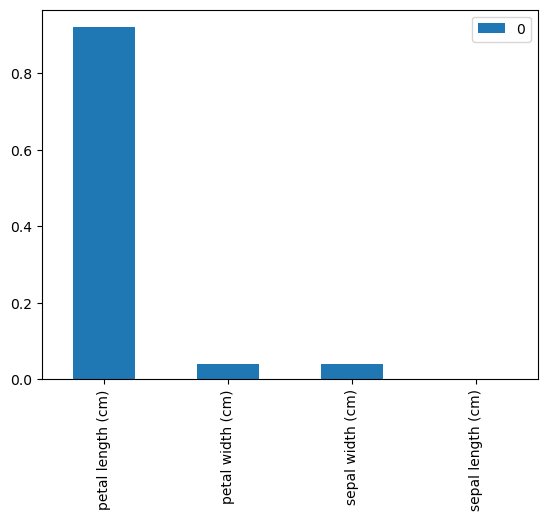

In [39]:
feature_importance.head(10).plot(kind='bar')